In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist   
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [21]:
# Instantiate the builder for Oxford Flowers 102 dataset
builder = tfds.builder('oxford_flowers102')

In [15]:
builder.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling C:\Users\user\tensorflow_datasets\oxford_flowers102\incomplete.EAMP4S_2.1.1\oxford_flowers102-train.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\user\tensorflow_datasets\oxford_flowers102\incomplete.EAMP4S_2.1.1\oxford_flowers102-test.t…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\user\tensorflow_datasets\oxford_flowers102\incomplete.EAMP4S_2.1.1\oxford_flowers102-valida…

Dataset oxford_flowers102 downloaded and prepared to C:\Users\user\tensorflow_datasets\oxford_flowers102\2.1.1. Subsequent calls will reuse this data.


In [22]:
train_dataset = builder.as_dataset(split='train', as_supervised=True)
validation_dataset = builder.as_dataset(split='validation', as_supervised=True)
test_dataset = builder.as_dataset(split='test', as_supervised=True)

In [23]:
info = builder.info
print(info)

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see this
    [issue](https://github.com/tensorflow/datasets/issues/3022).
    """,
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102

In [24]:
print(f"Train examples: {info.splits['train'].num_examples}")
print(f"Validation examples: {info.splits['validation'].num_examples}")
print(f"Test examples: {info.splits['test'].num_examples}")

Train examples: 1020
Validation examples: 1020
Test examples: 6149


In [25]:
print("Features:", info.features)

Features: FeaturesDict({
    'file_name': Text(shape=(), dtype=string),
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=102),
})


In [34]:
def show_examples(dataset):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(9)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy())
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')
    plt.show()

In [32]:
class_names = builder.info.features['label'].names
print(class_names) 

['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'ca

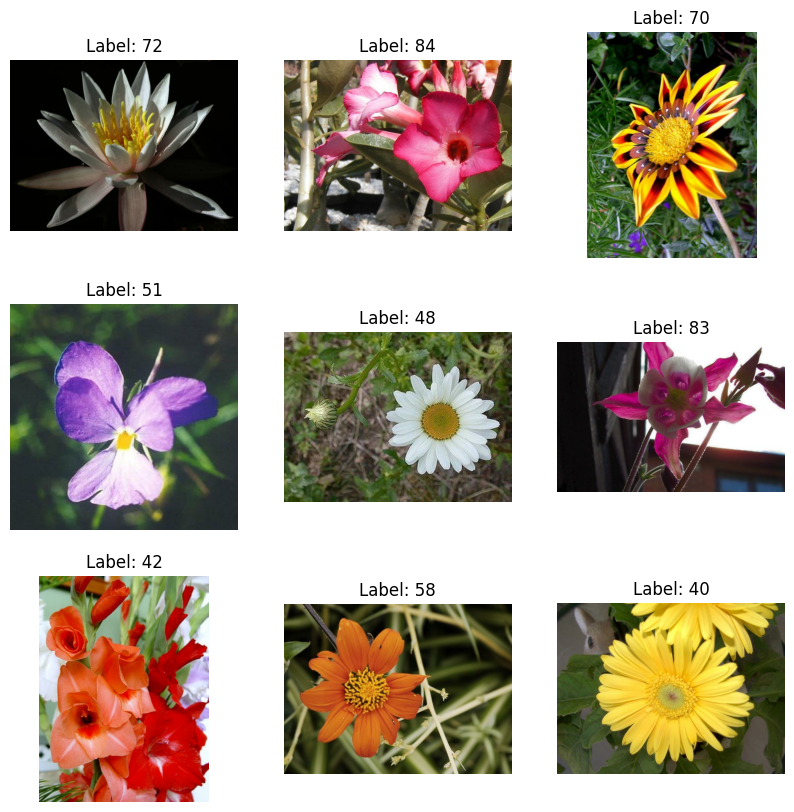

In [27]:
show_examples(train_dataset)

In [28]:
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))  # Resize images to a fixed size
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image, label

In [29]:
train_dataset = train_dataset.map(preprocess).batch(32).shuffle(1000)
validation_dataset = validation_dataset.map(preprocess).batch(32)
test_dataset = test_dataset.map(preprocess).batch(32)

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(info.features['label'].num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 746ms/step - accuracy: 0.0120 - loss: 4.7793 - val_accuracy: 0.0353 - val_loss: 4.5208
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 653ms/step - accuracy: 0.0747 - loss: 4.3505 - val_accuracy: 0.0647 - val_loss: 4.0847
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 682ms/step - accuracy: 0.2316 - loss: 3.3847 - val_accuracy: 0.1176 - val_loss: 3.8384
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 620ms/step - accuracy: 0.5975 - loss: 1.8135 - val_accuracy: 0.1490 - val_loss: 3.9732
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 707ms/step - accuracy: 0.8994 - loss: 0.4870 - val_accuracy: 0.1608 - val_loss: 4.5774
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 653ms/step - accuracy: 0.9809 - loss: 0.1183 - val_accuracy: 0.1451 - val_loss: 5.0243
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 704ms/step - accuracy: 0.9937 - loss: 0.0399 - val_accuracy: 0.1765 - val_loss: 4.9131
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 639ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accu

In [35]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.2f}")


193/193 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.1583 - loss: 5.5950
Test Accuracy: 0.16
